In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


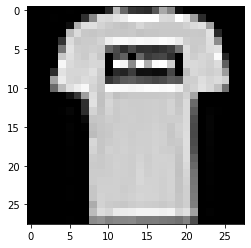

In [4]:
plt.imshow(x_train[1], cmap='gray')

In [5]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [7]:
x_train = x_train.reshape(60000, 784);
print("x_train shape:", x_train.shape) 
x_test = x_test.reshape(10000, 784);
print("x_test shape:", x_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [8]:
x_train_n = sklearn.preprocessing.normalize(x_train)
x_test_n = sklearn.preprocessing.normalize(x_test)

In [9]:
x_train_n = x_train_n.transpose()

In [12]:
sim = np.matmul(x_test_n, x_train_n)

MemoryError: Unable to allocate array with shape (10000, 60000) and data type float64

In [ ]:
print(sim)
print("sim shape:", sim.shape)

In [10]:
ranks = np.argsort(sim, axis=1)[:,::-1]

NameError: name 'sim' is not defined

In [11]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (60000, 28, 28))
x_test = np.reshape(x_test, (10000, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 900 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

NameError: name 'ranks' is not defined